In [1]:
import numpy as np
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False




In [2]:

filepath = '分心数据 1.xlsx'
data = pd.read_excel(filepath)
print(data.head(240)) 

     分心行为总计  电动自行车\n和摩托车  私人汽车  客车/货车  其他
0         2           11   158      6   1
1        11           20   188      6   0
2         6           18   200      8   0
3         9           28   210     10   1
4        19           39   164      9   0
..      ...          ...   ...    ...  ..
235      16           48   107      7   0
236      18           57   109      9   1
237      15           52    84      4   2
238      10           38    95      5   0
239      14           43   101      5   0

[240 rows x 5 columns]


In [3]:

x= data.drop(['其他'], axis=1)
y = data['分心行为总计']
# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


In [4]:
# 找到分割索引，将数据分为训练集和测试集
split_index = int(len(X_scaled) * 0.8)  # 90% 的数据用于训练，10% 的数据用于测试

X_train = X_scaled[:split_index]
X_test = X_scaled[split_index:]
y_train = y_scaled[:split_index]
y_test = y_scaled[split_index:]
# 转换数据形状以适应LSTM模型 (样本数, 时间步数, 特征数)
n_steps = 1  # 假设每个样本有1个时间步
n_features = X_train.shape[1]
X_train_reshaped = X_train.reshape((X_train.shape[0], n_steps, n_features))
X_test_reshaped = X_test.reshape((X_test.shape[0], n_steps, n_features))
data = {'layer1': 259, 'layer2': 410, 'layer3': 473, 'epochs': 7}

In [6]:
# 定义LSTM模型
model = Sequential()
model.add(LSTM(data['layer1'], activation='relu', return_sequences=True))
model.add(LSTM(data['layer2'], activation='relu', return_sequences=True))
model.add(LSTM(data['layer3'], activation='relu',return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train_reshaped, y_train, epochs=data['epochs'], batch_size=20)

y_pred_scaled = model.predict(X_test_reshaped)
y_pred = scaler.inverse_transform(y_pred_scaled)

# 将 y_test 转换为原始范围
y_test_original = scaler.inverse_transform(y_test)



Epoch 1/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1745
Epoch 2/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1154
Epoch 3/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0345
Epoch 4/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0257
Epoch 5/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0212
Epoch 6/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0135
Epoch 7/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0109
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


In [7]:
from sklearn.metrics import r2_score # 拟合优度
r2 = r2_score(y_test_original,y_pred)

#mse,mae,rmse
mse = mean_squared_error(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
rmse=math.sqrt(mse)
print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)
print("平均绝对误差 (MAE):", mae)
print("拟合优度:", r2)


均方误差 (MSE): 4.357393579413819
均方根误差 (RMSE): 2.0874370839414107
平均绝对误差 (MAE): 1.7041441798210144
拟合优度: 0.8645296755145269


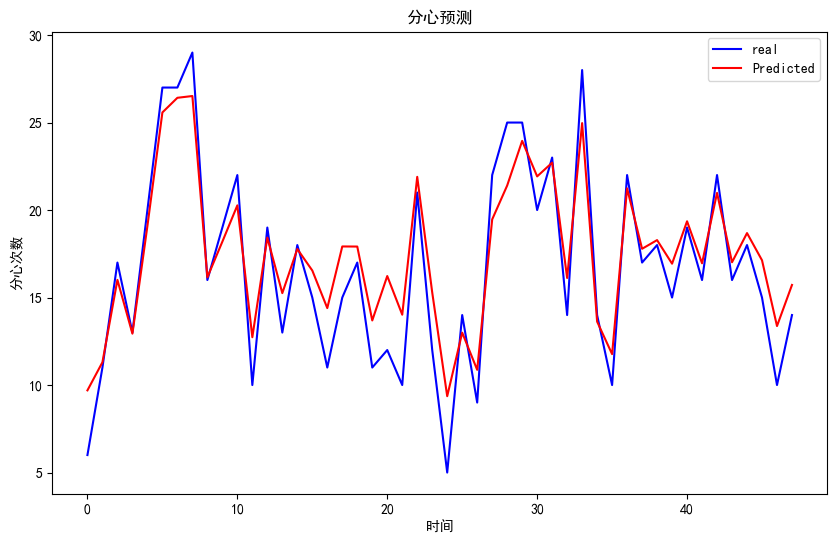

In [8]:
# 画图
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, color = 'blue', label = 'real')
plt.plot(y_pred, color = 'red', label = 'Predicted')
plt.title('分心预测')
plt.xlabel('时间')
plt.ylabel('分心次数')

plt.legend()
plt.savefig('分心行为测试集预测（公众号）.jpg')
plt.show()
